<a href="https://colab.research.google.com/github/prerna-roy/spam_detection_nlp/blob/main/spam_detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potential Datasets 

1. https://www.kaggle.com/datasets/imdeepmind/preprocessed-trec-2007-public-corpus-dataset

    a. large dataset size; emails; imabalanced

2. https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
    
    b. about 5000 records in total, two columns of info; SMS; imbalanced


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 

## Cleaning the SMS dataset to make it useable

In [6]:
spam_sms = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL Project - 6 9 22/data/spam.csv", encoding="ISO-8859-1")
spam_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
spam_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
spam_sms = spam_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
spam_sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam_sms = spam_sms.rename(columns={"v1":"class", "v2":"message"})
spam_sms.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#save the cleaned spam_sms as a csv 
spam_sms.to_csv("/content/drive/MyDrive/Colab Notebooks/DL Project - 6 9 22/data/spam_clean.csv")

## Reviewing the emails dataset

In [14]:
spam_email = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL Project - 6 9 22/data/processed_data.csv")

In [15]:
spam_email.head()   #label: This is the label for the email, if it is 1 then spam else ham

,label,subject,email_to,email_from,message
0,1,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,0,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,1,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,1,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...


In [16]:
spam_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75419 entries, 0 to 75418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       75419 non-null  int64 
 1   subject     74626 non-null  object
 2   email_to    74843 non-null  object
 3   email_from  75419 non-null  object
 4   message     73932 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [21]:
spam_email[spam_email.isnull().any(axis=1)]  # 2621 rows with NaN values; can be removed because the dataset is huge and it accounts for less than 0.03% of the total dataset 

,label,subject,email_to,email_from,message
35,1,Are You Paying Too Much for Auto Insurance?,producttestpanel@speedy.uwaterloo.ca,QuoteWizard <QuoteWizard@laneswatcharts.com>,NaN
63,1,"adf, Your next vacation is on us",producttestpanel@speedy.uwaterloo.ca,Cruisedirector <Cruisedirector@massiveservices...,NaN
263,1,NaN,NaN,"""Joan Rodriguez"" <don't71@certifiedmail.com>",mwpnjvye\nSubject: The next generation of enla...
286,1,Low credit score? O.K.,producttestpanel@speedy.uwaterloo.ca,Goldstatus <Goldstatus@laneswatcharts.com>,NaN
381,1,Attention!!!,NaN,"""Rains Marve"" <rains_a1@hotmail.com>","Prof. Rains Marve,\n# 41 Easton Street,\nLondo..."
...,...,...,...,...,...
75190,1,NaN,NaN,zskkuyzrlfrox@yahoo.com,NaN
75216,1,\n =?GB2312?B?0MKhpMbzoaTStaGku+GhpLzGoaTXvKGk...,NaN,=?GB2312?B?xe3PyMn6?= <woeyy@doein.com>,=?GB2312?B?0KGk1MuhpNPDo6i436Gi1tC8tqOpxeChpNG...
75288,1,NaN,NaN,Sherman2Webster@dpsworld.com,"for ; Tue, 11 Jul 2006 12:31:06 -0400\nReceive..."
75309,1,URGENT HELP,NaN,MR WILLIAMS SMITH SMITH <w.smith_g18@hotmail.com>,"Content-Type: text/plain; charset=""iso-8859-1""..."


In [22]:
spam_email.dropna(inplace=True)
spam_email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72798 entries, 0 to 75418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       72798 non-null  int64 
 1   subject     72798 non-null  object
 2   email_to    72798 non-null  object
 3   email_from  72798 non-null  object
 4   message     72798 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


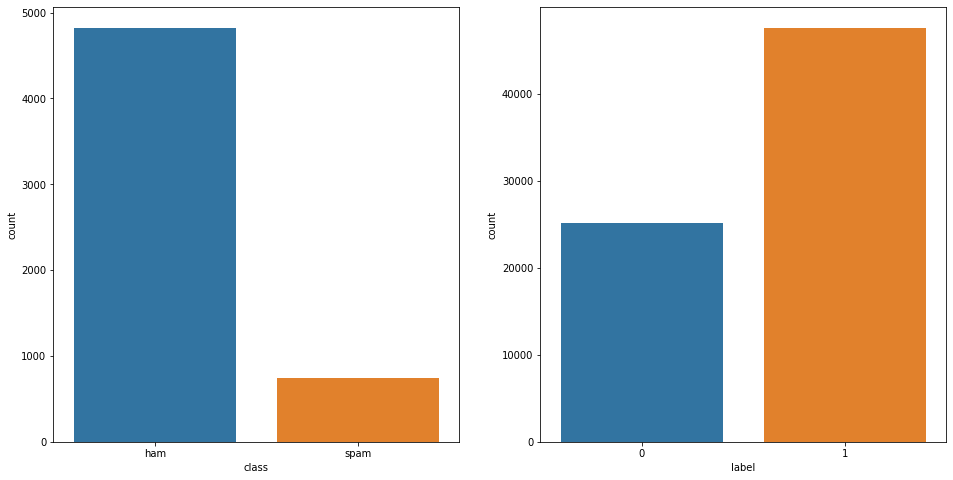

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
spam_email['label'] = spam_email['label'].astype("object")
sns.countplot(x=spam_sms['class'], ax=axes[0])
sns.countplot(x=spam_email['label'], ax=axes[1])

# Spam emails has more data and more spam data available - can use downsampling and get a balanced amount of training data compared to spam_sms 
# Spam SMS is more realistic as it has more 'real' messages than spam ones. Easier to process as well due to smaller dataset size 

'''
- the spam email dataset has much more data, and also has more spam emails than normal ones. so a pro is that we can use downsampling quite safely as we'll still have about 25000 email records and can have a 
balanced training dataset. however a con is that because the dataset size is huge and the information given is quite irregular in structure, there will be a lot of data cleaning/preprocessing and it will also be 
time consuming to train the data.

- the spam SMS dataset has much less data, totalling about 5500 records altogether. it is quite imbalanced, and there is more real SMS than spam SMS in the dataset, so we will either have to use SMOTE or 
upsampling (which can give variable results). however, because it is smaller and more structured/somewhat cleaned already, there is less preprocessing to do and it won't take too long to train the data
'''